## Feature Comparison

In [2]:
from prettytable import PrettyTable

# First table
table1 = PrettyTable()
table1.field_names = ["Feature", "Importance"]
table1.add_row(["Winter Hurs", 0.072497])
table1.add_row(["Summer Psl", 0.068379])
table1.add_row(["Hurs", 0.052468])
table1.add_row(["Autumn Psl", 0.049298])
table1.add_row(["Spring Psl", 0.047347])
table1.add_row(["Spring Hurs", 0.045244])
table1.add_row(["Winter Psl", 0.041467])
table1.add_row(["Summer Hurs", 0.035880])
table1.add_row(["Autumn Hurs", 0.030787])
table1.add_row(["Winter Sun", 0.030633])
table1.title = "Table 1: Random Forest"

# Second table
table2 = PrettyTable()
table2.field_names = ["Feature", "Importance"]
table2.add_row(["Hurs", 0.181508])
table2.add_row(["Summer Psl", 0.096604])
table2.add_row(["Winter Tmin", 0.083764])
table2.add_row(["Spring Psl", 0.067799])
table2.add_row(["Autumn Psl", 0.060584])
table2.add_row(["Winter Hurs", 0.057498])
table2.add_row(["Winter Sun", 0.051351])
table2.add_row(["Summer Sun", 0.047972])
table2.add_row(["Spring Sun", 0.046300])
table2.add_row(["Winter Psl", 0.041817])
table2.title = "Table 2: AdaBoost"

# Third table
table3 = PrettyTable()
table3.field_names = ["Specs", "Score"]
table3.add_row(["Winter Hurs", 205.361891])
table3.add_row(["Hurs", 170.217693])
table3.add_row(["Spring Hurs", 136.996493])
table3.add_row(["Winter Sun", 128.921980])
table3.add_row(["Summer Psl", 122.603037])
table3.add_row(["Autumn Frost", 122.098991])
table3.add_row(["Winter Tmin", 90.097342])
table3.add_row(["Winter Temp", 89.742236])
table3.add_row(["Autumn Hurs", 89.593938])
table3.add_row(["Spring Frost", 89.147996])
table3.title = "Table 3: Chi Squared"

# Get string representations
table1_str = table1.get_string()
table2_str = table2.get_string()
table3_str = table3.get_string()

# Split strings into lines
table1_lines = table1_str.splitlines()
table2_lines = table2_str.splitlines()
table3_lines = table3_str.splitlines()

# Find the maximum number of lines in the three tables
max_lines = max(len(table1_lines), len(table2_lines), len(table3_lines))

# Pad shorter tables with empty lines
table1_lines += [''] * (max_lines - len(table1_lines))
table2_lines += [''] * (max_lines - len(table2_lines))
table3_lines += [''] * (max_lines - len(table3_lines))

# Print tables side by side
for line1, line2, line3 in zip(table1_lines, table2_lines, table3_lines):
    print(f"{line1.ljust(40)}  {line2.ljust(40)}  {line3}")


+--------------------------+              +--------------------------+              +---------------------------+
|  Table 1: Random Forest  |              |    Table 2: AdaBoost     |              |    Table 3: Chi Squared   |
+-------------+------------+              +-------------+------------+              +--------------+------------+
|   Feature   | Importance |              |   Feature   | Importance |              |    Specs     |   Score    |
+-------------+------------+              +-------------+------------+              +--------------+------------+
| Winter Hurs |  0.072497  |              |     Hurs    |  0.181508  |              | Winter Hurs  | 205.361891 |
|  Summer Psl |  0.068379  |              |  Summer Psl |  0.096604  |              |     Hurs     | 170.217693 |
|     Hurs    |  0.052468  |              | Winter Tmin |  0.083764  |              | Spring Hurs  | 136.996493 |
|  Autumn Psl |  0.049298  |              |  Spring Psl |  0.067799  |              |  W

## Removing Top Features

In [2]:
from sklearn.model_selection import train_test_split
import xarray as xr
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from skimage.measure import block_reduce
from sklearn.preprocessing import MinMaxScaler
from scipy.stats import sem
from scipy.stats import t

data_temp = xr.open_mfdataset(r"C:\Users\iarla\OneDrive\Documents\MSc_Project\HadUK_data\Seasonal_Data\12km_Season_Temp\*.nc", parallel=True)
data_tmax = xr.open_mfdataset(r"C:\Users\iarla\OneDrive\Documents\MSc_Project\HadUK_data\Seasonal_Data\12km_Season_Tmax\*.nc", parallel=True)
data_tmin = xr.open_mfdataset(r"C:\Users\iarla\OneDrive\Documents\MSc_Project\HadUK_data\Seasonal_Data\12km_Season_Tmin\*.nc", parallel=True)
data_rain = xr.open_mfdataset(r"C:\Users\iarla\OneDrive\Documents\MSc_Project\HadUK_data\Seasonal_Data\12km_Season_Rain\*.nc", parallel=True)
data_hurs = xr.open_mfdataset(r"C:\Users\iarla\OneDrive\Documents\MSc_Project\HadUK_data\Seasonal_Data\12km_Season_Humidity\*.nc", parallel=True)
data_sun = xr.open_mfdataset(r"C:\Users\iarla\OneDrive\Documents\MSc_Project\HadUK_data\Seasonal_Data\12km_Season_Sun\*.nc", parallel=True)
data_frost = xr.open_mfdataset(r"C:\Users\iarla\OneDrive\Documents\MSc_Project\HadUK_data\Seasonal_Data\12km_Season_Frost\*.nc", parallel=True)
data_psl = xr.open_mfdataset(r"C:\Users\iarla\OneDrive\Documents\MSc_Project\HadUK_data\Seasonal_Data\12km_Season_psl\*.nc", parallel=True)
data_wind = xr.open_mfdataset(r"C:\Users\iarla\OneDrive\Documents\MSc_Project\HadUK_data\Seasonal_Data\12km_Season_Wind\*.nc", parallel=True)

In [3]:
rain = np.array(data_rain['rainfall'])
winter_rain = rain[3::4]
summer_rain = rain[5::4]
spring_rain = rain[4::4]
autumn_rain = rain[6::4]
hurs = np.array(data_hurs['hurs'])
winter_hurs = hurs[3::4]
summer_hurs = hurs[5::4]
spring_hurs = hurs[4::4]
autumn_hurs = hurs[6::4]
temp = np.array(data_temp['tas'])
winter_temp = temp[3::4]
summer_temp = temp[5::4]
spring_temp = temp[4::4]
autumn_temp = temp[6::4]
temp_max = np.array(data_tmax['tasmax'])
winter_tmax = temp_max[3::4]
summer_tmax = temp_max[5::4]
spring_tmax = temp_max[4::4]
autumn_tmax = temp_max[6::4]
temp_min = np.array(data_tmin['tasmin'])
winter_tmin = temp_min[3::4]
summer_tmin = temp_min[5::4]
spring_tmin = temp_min[4::4]
autumn_tmin = temp_min[6::4]
sun = np.array(data_sun['sun'])
winter_sun = sun[3::4]
summer_sun = sun[5::4]
spring_sun = sun[4::4]
autumn_sun = sun[6::4]
frost = np.array(data_frost['groundfrost'])
winter_frost = frost[3::4]
summer_frost = frost[5::4]
spring_frost = frost[4::4]
autumn_frost = frost[6::4]
psl = np.array(data_psl['psl'])
winter_psl = psl[3::4]
summer_psl = psl[5::4]
spring_psl = psl[4::4]
autumn_psl = psl[6::4]
wind = np.array(data_wind['sfcWind'])
winter_wind = wind[3::4]
summer_wind = wind[5::4]
spring_wind = wind[4::4]
autumn_wind = wind[6::4]

In [4]:
temp_reduced = block_reduce(temp, block_size=(4, 1, 1), func=np.mean, cval=np.mean(temp))
tmax_reduced = block_reduce(temp_max, block_size=(4, 1, 1), func=np.mean, cval=np.mean(temp_max))
tmin_reduced = block_reduce(temp_min, block_size=(4, 1, 1), func=np.mean, cval=np.mean(temp_min))
rain_reduced = block_reduce(rain, block_size=(4, 1, 1), func=np.mean, cval=np.mean(rain))
hurs_reduced = block_reduce(hurs, block_size=(4, 1, 1), func=np.mean, cval=np.mean(hurs))
sun_reduced = block_reduce(sun, block_size=(4, 1, 1), func=np.mean, cval=np.mean(sun))
frost_reduced = block_reduce(frost, block_size=(4, 1, 1), func=np.mean, cval=np.mean(frost))
psl_reduced = block_reduce(psl, block_size=(4, 1, 1), func=np.mean, cval=np.mean(psl))
wind_reduced = block_reduce(wind, block_size=(4, 1, 1), func=np.mean, cval=np.mean(wind))

In [26]:
min_length = len(autumn_wind)
rain_reduced = rain_reduced[:min_length]
hurs_reduced = hurs_reduced[:min_length]
temp_reduced = temp_reduced[:min_length]
tmax_reduced = tmax_reduced[:min_length]
tmin_reduced = tmin_reduced[:min_length]
sun_reduced = sun_reduced[:min_length]
frost_reduced = frost_reduced[:min_length]
wind_reduced = wind_reduced[:min_length]
psl_reduced = psl_reduced[:min_length]
winter_rain = winter_rain[:min_length]
summer_rain = summer_rain[:min_length]
spring_rain = spring_rain[:min_length]
autumn_rain = autumn_rain[:min_length]
winter_hurs = winter_hurs[:min_length]
summer_hurs = summer_hurs[:min_length]
spring_hurs = spring_hurs[:min_length]
autumn_hurs = autumn_hurs[:min_length]
winter_temp = winter_temp[:min_length]
summer_temp = summer_temp[:min_length]
spring_temp = spring_temp[:min_length]
autumn_temp = autumn_temp[:min_length]
winter_tmax = winter_tmax[:min_length]
summer_tmax = summer_tmax[:min_length]
spring_tmax = spring_tmax[:min_length]
autumn_tmax = autumn_tmax[:min_length]
winter_tmin = winter_tmin[:min_length]
summer_tmin = summer_tmin[:min_length]
spring_tmin = spring_tmin[:min_length]
autumn_tmin = autumn_tmin[:min_length]
winter_sun = winter_sun[:min_length]
summer_sun = summer_sun[:min_length]
spring_sun = spring_sun[:min_length]
autumn_sun = autumn_sun[:min_length]
winter_frost = winter_frost[:min_length]
summer_frost = summer_frost[:min_length]
spring_frost = spring_frost[:min_length]
autumn_frost = autumn_frost[:min_length]
winter_psl = winter_psl[:min_length]
summer_psl = summer_psl[:min_length]
spring_psl = spring_psl[:min_length]
autumn_psl = autumn_psl[:min_length]
winter_wind = winter_wind[:min_length]
summer_wind = summer_wind[:min_length]
spring_wind = spring_wind[:min_length]
autumn_wind = autumn_wind[:min_length]

In [27]:
scaler = MinMaxScaler()

rain_reduced = scaler.fit_transform(rain_reduced.reshape(-1, 1)).flatten()
hurs_reduced = scaler.fit_transform(hurs_reduced.reshape(-1, 1)).flatten()
temp_reduced = scaler.fit_transform(temp_reduced.reshape(-1, 1)).flatten()
tmax_reduced = scaler.fit_transform(tmax_reduced.reshape(-1, 1)).flatten()
tmin_reduced = scaler.fit_transform(tmin_reduced.reshape(-1, 1)).flatten()
sun_reduced = scaler.fit_transform(sun_reduced.reshape(-1, 1)).flatten()
frost_reduced = scaler.fit_transform(frost_reduced.reshape(-1, 1)).flatten()
wind_reduced = scaler.fit_transform(wind_reduced.reshape(-1, 1)).flatten()
psl_reduced = scaler.fit_transform(psl_reduced.reshape(-1, 1)).flatten()
winter_rain = scaler.fit_transform(winter_rain.reshape(-1, 1)).flatten()
summer_rain = scaler.fit_transform(summer_rain.reshape(-1, 1)).flatten()
spring_rain = scaler.fit_transform(spring_rain.reshape(-1, 1)).flatten()
autumn_rain = scaler.fit_transform(autumn_rain.reshape(-1, 1)).flatten()
winter_hurs = scaler.fit_transform(winter_hurs.reshape(-1, 1)).flatten()
summer_hurs = scaler.fit_transform(summer_hurs.reshape(-1, 1)).flatten()
spring_hurs = scaler.fit_transform(spring_hurs.reshape(-1, 1)).flatten()
autumn_hurs = scaler.fit_transform(autumn_hurs.reshape(-1, 1)).flatten()
winter_temp = scaler.fit_transform(winter_temp.reshape(-1, 1)).flatten()
summer_temp = scaler.fit_transform(summer_temp.reshape(-1, 1)).flatten()
spring_temp = scaler.fit_transform(spring_temp.reshape(-1, 1)).flatten()
autumn_temp = scaler.fit_transform(autumn_temp.reshape(-1, 1)).flatten()
winter_tmax = scaler.fit_transform(winter_tmax.reshape(-1, 1)).flatten()
summer_tmax = scaler.fit_transform(summer_tmax.reshape(-1, 1)).flatten()
spring_tmax = scaler.fit_transform(spring_tmax.reshape(-1, 1)).flatten()
autumn_tmax = scaler.fit_transform(autumn_tmax.reshape(-1, 1)).flatten()
winter_tmin = scaler.fit_transform(winter_tmin.reshape(-1, 1)).flatten()
summer_tmin = scaler.fit_transform(summer_tmin.reshape(-1, 1)).flatten()
spring_tmin = scaler.fit_transform(spring_tmin.reshape(-1, 1)).flatten()
autumn_tmin = scaler.fit_transform(autumn_tmin.reshape(-1, 1)).flatten()
winter_sun = scaler.fit_transform(winter_sun.reshape(-1, 1)).flatten()
summer_sun = scaler.fit_transform(summer_sun.reshape(-1, 1)).flatten()
spring_sun = scaler.fit_transform(spring_sun.reshape(-1, 1)).flatten()
autumn_sun = scaler.fit_transform(autumn_sun.reshape(-1, 1)).flatten()
winter_frost = scaler.fit_transform(winter_frost.reshape(-1, 1)).flatten()
summer_frost = scaler.fit_transform(summer_frost.reshape(-1, 1)).flatten()
spring_frost = scaler.fit_transform(spring_frost.reshape(-1, 1)).flatten()
autumn_frost = scaler.fit_transform(autumn_frost.reshape(-1, 1)).flatten()
winter_psl = scaler.fit_transform(winter_psl.reshape(-1, 1)).flatten()
summer_psl = scaler.fit_transform(summer_psl.reshape(-1, 1)).flatten()
spring_psl = scaler.fit_transform(spring_psl.reshape(-1, 1)).flatten()
autumn_psl = scaler.fit_transform(autumn_psl.reshape(-1, 1)).flatten()
winter_wind = scaler.fit_transform(winter_wind.reshape(-1, 1)).flatten()
summer_wind = scaler.fit_transform(summer_wind.reshape(-1, 1)).flatten()
spring_wind = scaler.fit_transform(spring_wind.reshape(-1, 1)).flatten()
autumn_wind = scaler.fit_transform(autumn_wind.reshape(-1, 1)).flatten()

print(len(autumn_wind), len(temp_reduced), len(winter_rain), len(summer_sun))

486752 486752 486752 486752


In [56]:
num_years_temp, x, y = temp.shape

# Create an array of years to match the reshaped temperature arrays
years_expanded = np.repeat(np.arange(1970, 2023), x * y)
print(years_expanded.shape)
data_dict = {
    'Year': years_expanded,
    'Rain': rain_reduced,
    'Hurs': hurs_reduced,
    'Temperature': temp_reduced,
    'Tmax': tmax_reduced,
    'Tmin': tmin_reduced,
    'Sun': sun_reduced,
    'Frost': frost_reduced,
    'Wind': wind_reduced,
    'Psl': psl_reduced,
    'Winter Rain': winter_rain,
    'Summer Rain': summer_rain,
    'Spring Rain': spring_rain,
    'Autumn Rain': autumn_rain,
    'Winter Hurs': winter_hurs,
    'Summer Hurs': summer_hurs,
    'Spring Hurs': spring_hurs,
    'Autumn Hurs': autumn_hurs,
    'Winter Temp': winter_temp,
    'Summer Temp': summer_temp,
    'Spring Temp': spring_temp,
    'Autumn Temp': autumn_temp,
    'Winter Tmax': winter_tmax,
    'Summer Tmax': summer_tmax,
    'Spring Tmax': spring_tmax,
    'Autumn Tmax': autumn_tmax,
    'Winter Tmin': winter_tmin,
    'Summer Tmin': summer_tmin,
    'Spring Tmin': spring_tmin,
    'Autumn Tmin': autumn_tmin,
    'Winter Sun': winter_sun,
    'Summer Sun': summer_sun,
    'Spring Sun': spring_sun,
    'Autumn Sun': autumn_sun,
    'Winter Frost': winter_frost,
    'Summer Frost': summer_frost,
    'Spring Frost': spring_frost,
    'Autumn Frost': autumn_frost,
    'Winter Psl': winter_psl,
    'Summer Psl': summer_psl,
    'Spring Psl': spring_psl,
    'Autumn Psl': autumn_psl,
    'Winter Wind': winter_wind,
    'Summer Wind': summer_wind,
    'Spring Wind': spring_wind,
    'Autumn Wind': autumn_wind,
}


df = pd.DataFrame(data_dict)
df.set_index('Year', inplace=True)
df = df.sort_values(by='Year')
df.dropna(inplace=True)
df['Class'] = df.index.map(lambda year: 'pre_1990' if year < 1990 else 'post_1990')

(486752,)


In [57]:
from sklearn.ensemble import RandomForestClassifier

X = df[['Rain', 'Temperature', 'Tmax', 'Tmin',
    'Sun', 'Frost', 'Wind', 'Psl',
    'Winter Rain', 'Summer Rain', 'Spring Rain', 'Autumn Rain',
    'Summer Hurs', 'Autumn Hurs',
    'Winter Temp', 'Summer Temp', 'Spring Temp', 'Autumn Temp',
    'Winter Tmax', 'Summer Tmax', 'Spring Tmax', 'Autumn Tmax',
    'Summer Tmin', 'Spring Tmin', 'Autumn Tmin', 'Summer Sun', 'Spring Sun', 'Autumn Sun',
    'Winter Frost', 'Summer Frost', 'Spring Frost', 'Autumn Frost',
    'Winter Psl',
    'Winter Wind', 'Summer Wind', 'Spring Wind', 'Autumn Wind']]
y = df['Class']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

rf_classifier = RandomForestClassifier(random_state=0, n_estimators=150, max_features='sqrt')
rf_classifier.fit(X_train, y_train)

y_pred = rf_classifier.predict(X_test)

In [9]:
importances = rf_classifier.feature_importances_

feature_names = df[['Rain', 'Temperature', 'Tmax', 'Tmin',
    'Sun', 'Frost', 'Wind', 'Psl',
    'Winter Rain', 'Summer Rain', 'Spring Rain', 'Autumn Rain',
    'Summer Hurs', 'Autumn Hurs',
    'Winter Temp', 'Summer Temp', 'Spring Temp', 'Autumn Temp',
    'Winter Tmax', 'Summer Tmax', 'Spring Tmax', 'Autumn Tmax',
    'Summer Tmin', 'Spring Tmin', 'Autumn Tmin', 'Summer Sun', 'Spring Sun', 'Autumn Sun',
    'Winter Frost', 'Summer Frost', 'Spring Frost', 'Autumn Frost',
    'Winter Psl',
    'Winter Wind', 'Summer Wind', 'Spring Wind', 'Autumn Wind']].columns

importance_df = pd.DataFrame({'Feature': feature_names, 'Importance': importances})
importance_df = importance_df.sort_values(by='Importance', ascending=False)

top_10_features_rf = importance_df.head(10)

In [10]:
from sklearn.ensemble import AdaBoostClassifier
from sklearn.tree import DecisionTreeClassifier

X = df[['Rain', 'Temperature', 'Tmax', 'Tmin',
    'Sun', 'Frost', 'Wind', 'Psl',
    'Winter Rain', 'Summer Rain', 'Spring Rain', 'Autumn Rain',
    'Summer Hurs', 'Autumn Hurs',
    'Winter Temp', 'Summer Temp', 'Spring Temp', 'Autumn Temp',
    'Winter Tmax', 'Summer Tmax', 'Spring Tmax', 'Autumn Tmax',
    'Summer Tmin', 'Spring Tmin', 'Autumn Tmin', 'Summer Sun', 'Spring Sun', 'Autumn Sun',
    'Winter Frost', 'Summer Frost', 'Spring Frost', 'Autumn Frost',
    'Winter Psl',
    'Winter Wind', 'Summer Wind', 'Spring Wind', 'Autumn Wind']]
y = df['Class']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Instantiate a weak classifier (Decision Tree in this case)
base_classifier = DecisionTreeClassifier(max_depth=10, random_state=0)

# Instantiate the AdaBoost classifier
adaboost_classifier = AdaBoostClassifier(base_classifier, n_estimators=150, learning_rate=0.01, random_state=0)

# Train the AdaBoost classifier
adaboost_classifier.fit(X_train, y_train)

# Make predictions on the test set
y_pred = adaboost_classifier.predict(X_test)

In [11]:
importances = adaboost_classifier.feature_importances_

feature_names = df[['Rain', 'Temperature', 'Tmax', 'Tmin',
    'Sun', 'Frost', 'Wind', 'Psl',
    'Winter Rain', 'Summer Rain', 'Spring Rain', 'Autumn Rain',
    'Summer Hurs', 'Autumn Hurs',
    'Winter Temp', 'Summer Temp', 'Spring Temp', 'Autumn Temp',
    'Winter Tmax', 'Summer Tmax', 'Spring Tmax', 'Autumn Tmax',
    'Summer Tmin', 'Spring Tmin', 'Autumn Tmin', 'Summer Sun', 'Spring Sun', 'Autumn Sun',
    'Winter Frost', 'Summer Frost', 'Spring Frost', 'Autumn Frost',
    'Winter Psl',
    'Winter Wind', 'Summer Wind', 'Spring Wind', 'Autumn Wind']].columns

importance_df = pd.DataFrame({'Feature': feature_names, 'Importance': importances})
importance_df = importance_df.sort_values(by='Importance', ascending=False)

top_10_features_ada = importance_df.head(10)

In [12]:
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2

bestfeatures = SelectKBest(score_func=chi2, k=10)
fit = bestfeatures.fit(X_train,y_train)
dfscores = pd.DataFrame(fit.scores_)
dfcolumns = pd.DataFrame(X_train.columns)
featureScores = pd.concat([dfcolumns,dfscores],axis=1)
featureScores.columns = ['Specs','Score'] 

In [17]:
from prettytable import PrettyTable

# First table
table1 = PrettyTable()
table1.field_names = ["Feature", "Importance"]
table1.add_row(["Summer Hurs", 0.060087])
table1.add_row(["Winter Psl", 0.057783])
table1.add_row(["Autumn Hurs", 0.051121])
table1.add_row(["Winter Temp", 0.045828])
table1.add_row(["Spring Rain", 0.043465])
table1.add_row(["Psl", 0.042628])
table1.add_row(["Autumn Frost", 0.037831])
table1.add_row(["Autumn Sun", 0.036916])
table1.add_row(["Spring Frost", 0.035493])
table1.add_row(["Winter Tmax", 0.032917])
table1.title = "Table 1: Random Forest"

# Second table
table2 = PrettyTable()
table2.field_names = ["Feature", "Importance"]
table2.add_row(["Summer Hurs", 0.119064])
table2.add_row(["Winter Psl", 0.091368])
table2.add_row(["Winter Temp", 0.074896])
table2.add_row(["Spring Rain", 0.073003])
table2.add_row(["Psl", 0.050095])
table2.add_row(["Spring Frost", 0.049469])
table2.add_row(["Spring Sun", 0.047892])
table2.add_row(["Autumn Hurs", 0.044255])
table2.add_row(["Winter Frost", 0.034535])
table2.add_row(["Autumn Sun", 0.033348])
table2.title = "Table 2: AdaBoost"

# Third table
table3 = PrettyTable()
table3.field_names = ["Specs", "Score"]
table3.add_row(["Autumn Frost", 122.098991])
table3.add_row(["Winter Temp", 89.742236])
table3.add_row(["Spring Frost", 89.147996])
table3.add_row(["Autumn Hurs", 83.314371])
table3.add_row(["Summer Frost", 81.601164])
table3.add_row(["Winter Tmax", 78.321551])
table3.add_row(["Frost", 74.467126])
table3.add_row(["Spring Rain", 71.693555])
table3.add_row(["Summer Hurs", 62.053426])
table3.add_row(["Autumn Sun", 50.704088])
table3.title = "Table 3: Chi Squared"

# Get string representations
table1_str = table1.get_string()
table2_str = table2.get_string()
table3_str = table3.get_string()

# Split strings into lines
table1_lines = table1_str.splitlines()
table2_lines = table2_str.splitlines()
table3_lines = table3_str.splitlines()

# Find the maximum number of lines in the three tables
max_lines = max(len(table1_lines), len(table2_lines), len(table3_lines))

# Pad shorter tables with empty lines
table1_lines += [''] * (max_lines - len(table1_lines))
table2_lines += [''] * (max_lines - len(table2_lines))
table3_lines += [''] * (max_lines - len(table3_lines))

# Print tables side by side with titles
for line1, line2, line3 in zip(table1_lines, table2_lines, table3_lines):
    print(f"{line1.ljust(40)}  {line2.ljust(40)}  {line3}")



+---------------------------+             +---------------------------+             +---------------------------+
|   Table 1: Random Forest  |             |     Table 2: AdaBoost     |             |    Table 3: Chi Squared   |
+--------------+------------+             +--------------+------------+             +--------------+------------+
|   Feature    | Importance |             |   Feature    | Importance |             |    Specs     |   Score    |
+--------------+------------+             +--------------+------------+             +--------------+------------+
| Summer Hurs  |  0.060087  |             | Summer Hurs  |  0.119064  |             | Autumn Frost | 122.098991 |
|  Winter Psl  |  0.057783  |             |  Winter Psl  |  0.091368  |             | Winter Temp  | 89.742236  |
| Autumn Hurs  |  0.051121  |             | Winter Temp  |  0.074896  |             | Spring Frost | 89.147996  |
| Winter Temp  |  0.045828  |             | Spring Rain  |  0.073003  |             | Au

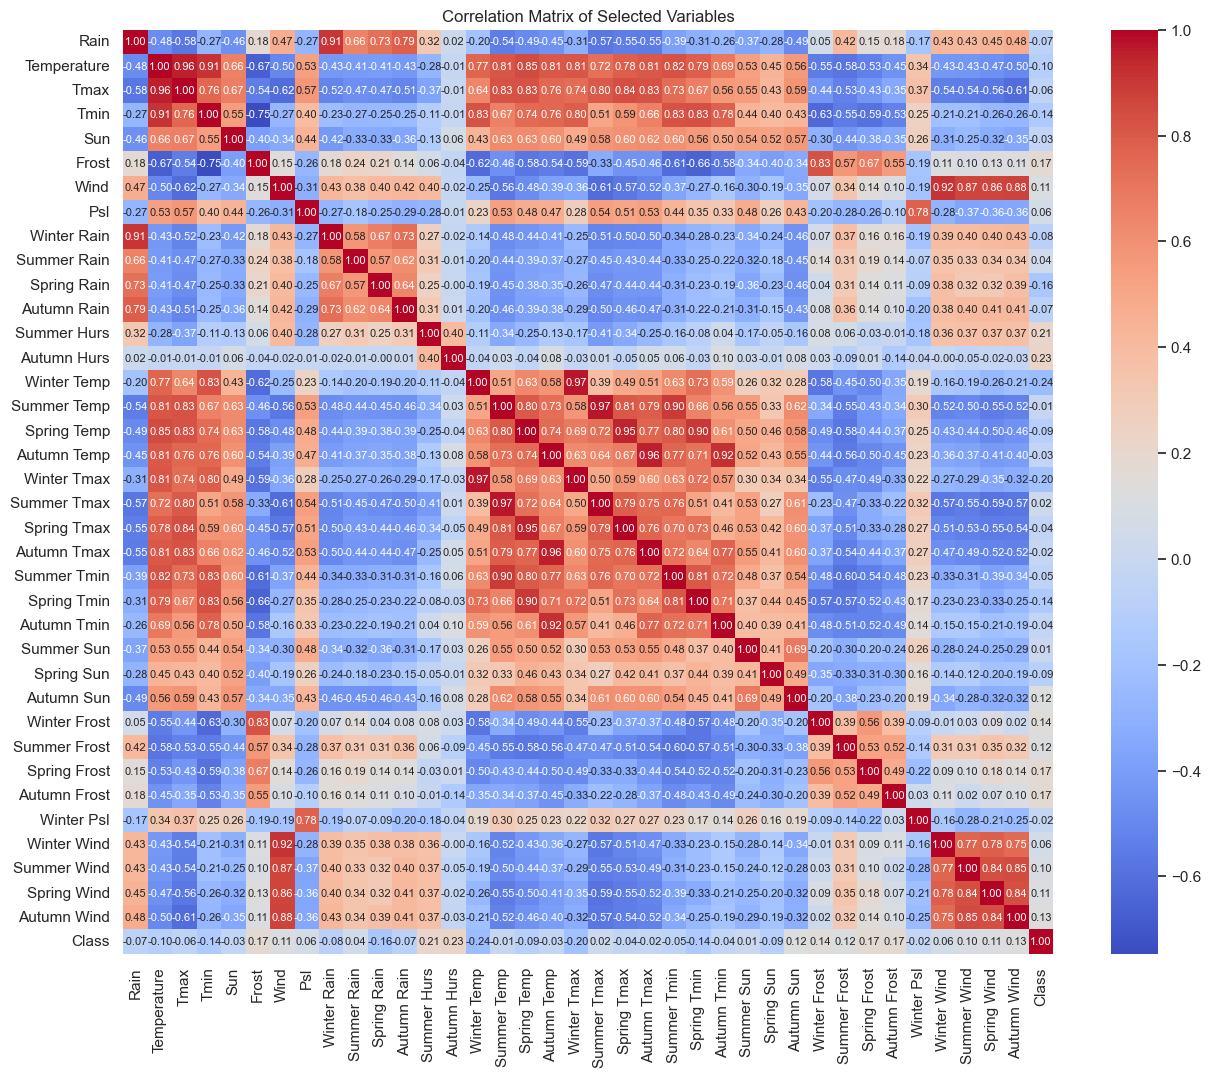

In [62]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Assuming 'df' is your DataFrame with the specified columns
selected_columns = ['Rain', 'Temperature', 'Tmax', 'Tmin',
                     'Sun', 'Frost', 'Wind', 'Psl',
                     'Winter Rain', 'Summer Rain', 'Spring Rain', 'Autumn Rain',
                     'Summer Hurs', 'Autumn Hurs',
                     'Winter Temp', 'Summer Temp', 'Spring Temp', 'Autumn Temp',
                     'Winter Tmax', 'Summer Tmax', 'Spring Tmax', 'Autumn Tmax',
                     'Summer Tmin', 'Spring Tmin', 'Autumn Tmin', 'Summer Sun', 'Spring Sun', 'Autumn Sun',
                     'Winter Frost', 'Summer Frost', 'Spring Frost', 'Autumn Frost',
                     'Winter Psl',
                     'Winter Wind', 'Summer Wind', 'Spring Wind', 'Autumn Wind', 'Class']

selected_df = df[selected_columns]

# Calculate the correlation matrix
correlation_matrix = selected_df.corr()

fontsize = 8

# Set up the matplotlib figure
plt.figure(figsize=(15, 12))

# Plot the correlation matrix using seaborn
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", annot_kws={'size': fontsize})

plt.title('Correlation Matrix of Selected Variables')
plt.show()


## Removing Bottom Features

In [30]:
from sklearn.ensemble import RandomForestClassifier

X = df[['Hurs',
     'Psl',
    'Winter Hurs', 'Summer Hurs', 'Spring Hurs', 'Autumn Hurs',
    'Winter Tmin', 'Autumn Tmin',
    'Winter Sun', 'Autumn Sun',
    'Winter Frost',
    'Winter Psl', 'Summer Psl', 'Spring Psl', 'Autumn Psl']]
y = df['Class']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

rf_classifier = RandomForestClassifier(random_state=0, n_estimators=150, max_features='sqrt')
rf_classifier.fit(X_train, y_train)

y_pred = rf_classifier.predict(X_test)

In [31]:
importances = rf_classifier.feature_importances_
feature_names = df[['Hurs',
     'Psl',
    'Winter Hurs', 'Summer Hurs', 'Spring Hurs', 'Autumn Hurs',
    'Winter Tmin', 'Autumn Tmin',
    'Winter Sun', 'Autumn Sun',
    'Winter Frost',
    'Winter Psl', 'Summer Psl', 'Spring Psl', 'Autumn Psl']].columns

importance_df = pd.DataFrame({'Feature': feature_names, 'Importance': importances})
importance_df = importance_df.sort_values(by='Importance', ascending=False)

top_10_features_rf = importance_df.head(10)

In [32]:
from sklearn.ensemble import AdaBoostClassifier
from sklearn.tree import DecisionTreeClassifier

X = df[['Hurs',
     'Psl',
    'Winter Hurs', 'Summer Hurs', 'Spring Hurs', 'Autumn Hurs',
    'Winter Tmin', 'Autumn Tmin',
    'Winter Sun', 'Autumn Sun',
    'Winter Frost',
    'Winter Psl', 'Summer Psl', 'Spring Psl', 'Autumn Psl']]
y = df['Class']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Instantiate a weak classifier (Decision Tree in this case)
base_classifier = DecisionTreeClassifier(max_depth=10, random_state=0)

# Instantiate the AdaBoost classifier
adaboost_classifier = AdaBoostClassifier(base_classifier, n_estimators=150, learning_rate=0.01, random_state=0)

# Train the AdaBoost classifier
adaboost_classifier.fit(X_train, y_train)

# Make predictions on the test set
y_pred = adaboost_classifier.predict(X_test)

In [33]:
importances = adaboost_classifier.feature_importances_
feature_names = df[['Hurs',
     'Psl',
    'Winter Hurs', 'Summer Hurs', 'Spring Hurs', 'Autumn Hurs',
    'Winter Tmin', 'Autumn Tmin',
    'Winter Sun', 'Autumn Sun',
    'Winter Frost',
    'Winter Psl', 'Summer Psl', 'Spring Psl', 'Autumn Psl']].columns

importance_df = pd.DataFrame({'Feature': feature_names, 'Importance': importances})
importance_df = importance_df.sort_values(by='Importance', ascending=False)

top_10_features_ada = importance_df.head(10)

In [40]:
from prettytable import PrettyTable

# Fourth table
table4 = PrettyTable()
table4.field_names = ["Feature", "Importance"]
table4.add_row(["Summer Psl", 0.109957])
table4.add_row(["Winter Psl", 0.093210])
table4.add_row(["Winter Hurs", 0.092542])
table4.add_row(["Autumn Psl", 0.091079])
table4.add_row(["Spring Psl", 0.089812])
table4.add_row(["Hurs", 0.067845])
table4.add_row(["Winter Tmin", 0.065107])
table4.add_row(["Psl", 0.062182])
table4.add_row(["Spring Hurs", 0.057636])
table4.add_row(["Winter Sun", 0.055265])
table4.title = "Table 1: Random Forest"

# Fifth table
table5 = PrettyTable()
table5.field_names = ["Feature", "Importance"]
table5.add_row(["Summer Psl", 0.128493])
table5.add_row(["Winter Hurs", 0.116591])
table5.add_row(["Winter Psl", 0.115816])
table5.add_row(["Autumn Hurs", 0.109275])
table5.add_row(["Spring Hurs", 0.073486])
table5.add_row(["Winter Frost", 0.071986])
table5.add_row(["Autumn Psl", 0.068645])
table5.add_row(["Spring Psl", 0.065436])
table5.add_row(["Hurs", 0.058766])
table5.add_row(["Winter Tmin", 0.051105])
table5.title = "Table 2: AdaBoost"

# Sixth table
table6 = PrettyTable()
table6.field_names = ["Specs", "Score"]
table6.add_row(["Winter Hurs", 201.332885])
table6.add_row(["Hurs", 163.976824])
table6.add_row(["Spring Hurs", 142.701761])
table6.add_row(["Winter Sun", 128.921980])
table6.add_row(["Summer Psl", 122.603037])
table6.add_row(["Winter Tmin", 90.097342])
table6.add_row(["Autumn Hurs", 83.314371])
table6.add_row(["Summer Hurs", 62.053426])
table6.add_row(["Autumn Sun", 50.704088])
table6.add_row(["Winter Frost", 48.526034])
table6.title = "Table 3: Chi Squared"

# Get string representations
table4_str = table4.get_string()
table5_str = table5.get_string()
table6_str = table6.get_string()

# Split strings into lines
table4_lines = table4_str.splitlines()
table5_lines = table5_str.splitlines()
table6_lines = table6_str.splitlines()

# Find the maximum number of lines in the three tables
max_lines = max(len(table4_lines), len(table5_lines), len(table6_lines))

# Pad shorter tables with empty lines
table4_lines += [''] * (max_lines - len(table4_lines))
table5_lines += [''] * (max_lines - len(table5_lines))
table6_lines += [''] * (max_lines - len(table6_lines))

# Print tables side by side with titles
for line4, line5, line6 in zip(table4_lines, table5_lines, table6_lines):
    print(f"{line4.ljust(40)}  {line5.ljust(40)}  {line6}")

+--------------------------+              +---------------------------+             +---------------------------+
|  Table 1: Random Forest  |              |     Table 2: AdaBoost     |             |    Table 3: Chi Squared   |
+-------------+------------+              +--------------+------------+             +--------------+------------+
|   Feature   | Importance |              |   Feature    | Importance |             |    Specs     |   Score    |
+-------------+------------+              +--------------+------------+             +--------------+------------+
|  Summer Psl |  0.109957  |              |  Summer Psl  |  0.128493  |             | Winter Hurs  | 201.332885 |
|  Winter Psl |  0.09321   |              | Winter Hurs  |  0.116591  |             |     Hurs     | 163.976824 |
| Winter Hurs |  0.092542  |              |  Winter Psl  |  0.115816  |             | Spring Hurs  | 142.701761 |
|  Autumn Psl |  0.091079  |              | Autumn Hurs  |  0.109275  |             |  W

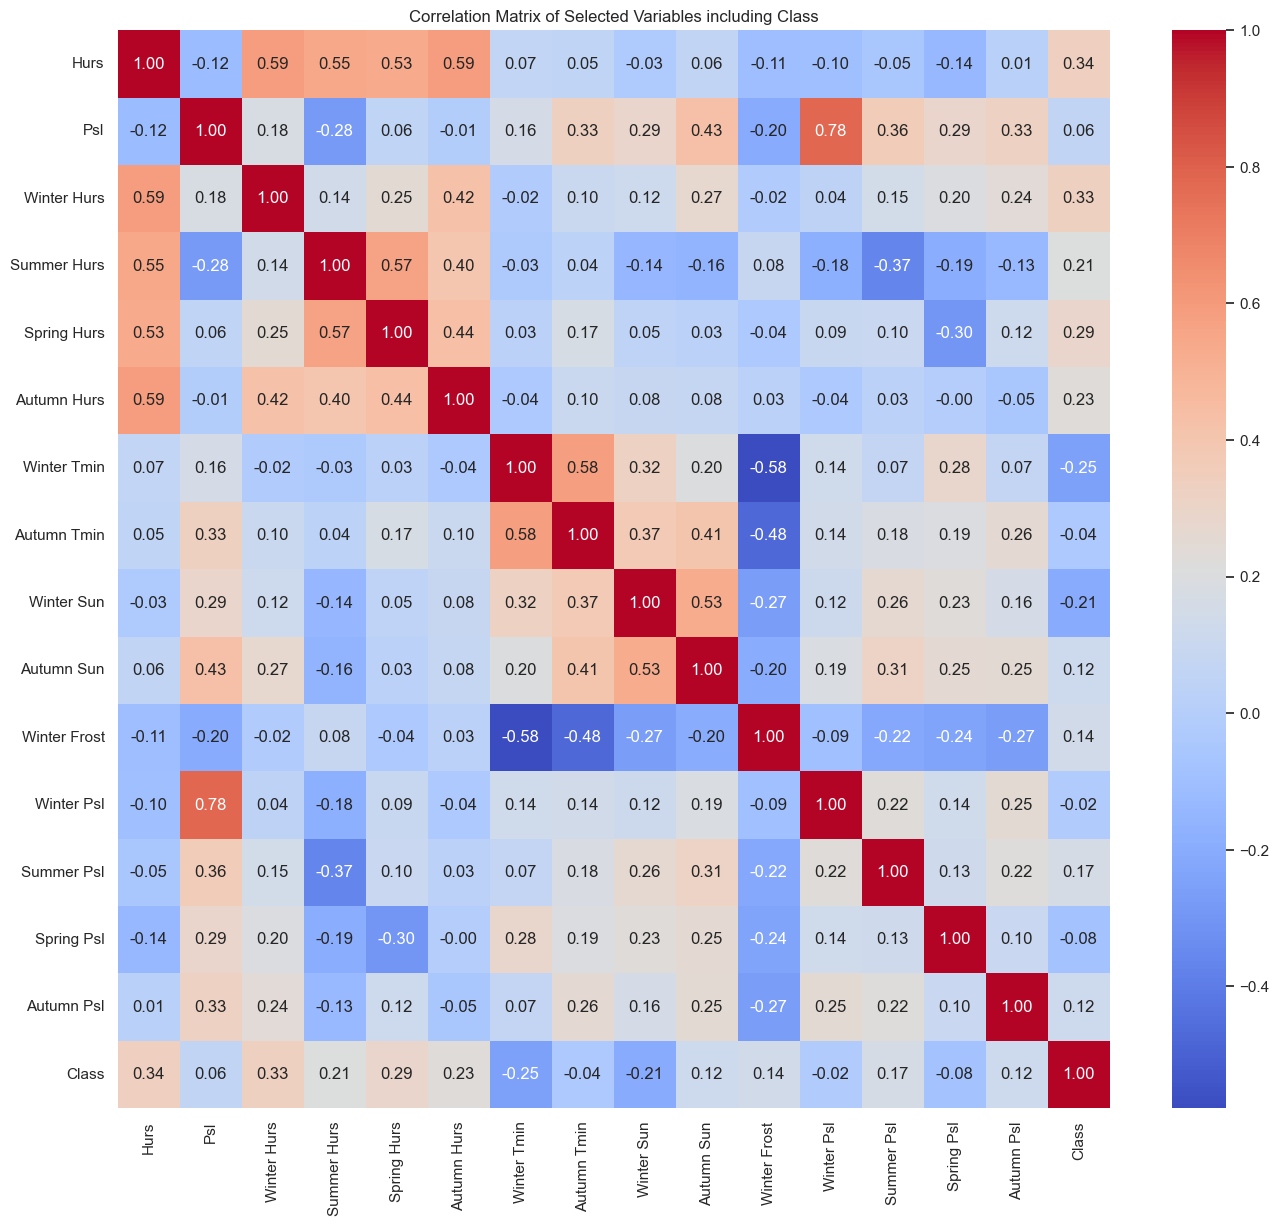

In [63]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Assuming 'df' is your DataFrame with the specified columns
selected_columns = ['Hurs', 'Psl',
                     'Winter Hurs', 'Summer Hurs', 'Spring Hurs', 'Autumn Hurs',
                     'Winter Tmin', 'Autumn Tmin',
                     'Winter Sun', 'Autumn Sun',
                     'Winter Frost',
                     'Winter Psl', 'Summer Psl', 'Spring Psl', 'Autumn Psl', 'Class']

selected_df = df[selected_columns]

# Calculate the correlation matrix
correlation_matrix = selected_df.corr()

# Set up the matplotlib figure
plt.figure(figsize=(16, 14))

# Plot the correlation matrix using seaborn
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")

plt.title('Correlation Matrix of Selected Variables including Class')
plt.show()

## Top and Bottom

In [44]:
from sklearn.ensemble import RandomForestClassifier

X = df[['Rain', 'Hurs', 'Temperature', 'Tmax',
    'Wind', 'Psl', 'Summer Rain', 'Autumn Rain',
    'Winter Hurs', 'Summer Hurs', 'Spring Hurs', 'Autumn Hurs',
    'Winter Temp', 'Summer Temp', 'Spring Temp', 'Autumn Temp',
    'Winter Sun',
    'Winter Psl', 'Summer Psl', 'Spring Psl', 'Autumn Psl',
    'Winter Wind', 'Summer Wind', 'Spring Wind', 'Autumn Wind']]
y = df['Class']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

rf_classifier = RandomForestClassifier(random_state=0, n_estimators=150, max_features='sqrt')
rf_classifier.fit(X_train, y_train)

y_pred = rf_classifier.predict(X_test)

In [45]:
importances = rf_classifier.feature_importances_
feature_names = df[['Rain', 'Hurs', 'Temperature', 'Tmax',
    'Wind', 'Psl', 'Summer Rain', 'Autumn Rain',
    'Winter Hurs', 'Summer Hurs', 'Spring Hurs', 'Autumn Hurs',
    'Winter Temp', 'Summer Temp', 'Spring Temp', 'Autumn Temp',
    'Winter Sun',
    'Winter Psl', 'Summer Psl', 'Spring Psl', 'Autumn Psl',
    'Winter Wind', 'Summer Wind', 'Spring Wind', 'Autumn Wind']].columns


importance_df = pd.DataFrame({'Feature': feature_names, 'Importance': importances})
importance_df = importance_df.sort_values(by='Importance', ascending=False)

top_10_features_rf = importance_df.head(10)

In [47]:
from sklearn.ensemble import AdaBoostClassifier
from sklearn.tree import DecisionTreeClassifier

X = df[['Rain', 'Hurs', 'Temperature', 'Tmax',
    'Wind', 'Psl', 'Summer Rain', 'Autumn Rain',
    'Winter Hurs', 'Summer Hurs', 'Spring Hurs', 'Autumn Hurs',
    'Winter Temp', 'Summer Temp', 'Spring Temp', 'Autumn Temp',
    'Winter Sun',
    'Winter Psl', 'Summer Psl', 'Spring Psl', 'Autumn Psl',
    'Winter Wind', 'Summer Wind', 'Spring Wind', 'Autumn Wind']]
y = df['Class']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Instantiate a weak classifier (Decision Tree in this case)
base_classifier = DecisionTreeClassifier(max_depth=10, random_state=0)

# Instantiate the AdaBoost classifier
adaboost_classifier = AdaBoostClassifier(base_classifier, n_estimators=150, learning_rate=0.01, random_state=0)

# Train the AdaBoost classifier
adaboost_classifier.fit(X_train, y_train)

# Make predictions on the test set
y_pred = adaboost_classifier.predict(X_test)

In [48]:
importances = adaboost_classifier.feature_importances_
feature_names = df[['Rain', 'Hurs', 'Temperature', 'Tmax',
    'Wind', 'Psl', 'Summer Rain', 'Autumn Rain',
    'Winter Hurs', 'Summer Hurs', 'Spring Hurs', 'Autumn Hurs',
    'Winter Temp', 'Summer Temp', 'Spring Temp', 'Autumn Temp',
    'Winter Sun',
    'Winter Psl', 'Summer Psl', 'Spring Psl', 'Autumn Psl',
    'Winter Wind', 'Summer Wind', 'Spring Wind', 'Autumn Wind']].columns


importance_df = pd.DataFrame({'Feature': feature_names, 'Importance': importances})
importance_df = importance_df.sort_values(by='Importance', ascending=False)

top_10_features_ada = importance_df.head(10)

In [49]:
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2

bestfeatures = SelectKBest(score_func=chi2, k=10)
fit = bestfeatures.fit(X_train,y_train)
dfscores = pd.DataFrame(fit.scores_)
dfcolumns = pd.DataFrame(X_train.columns)
featureScores = pd.concat([dfcolumns,dfscores],axis=1)
featureScores.columns = ['Specs','Score'] 

In [55]:
from prettytable import PrettyTable

# Seventh table
table7 = PrettyTable()
table7.field_names = ["Feature", "Importance"]
table7.add_row(["Summer Psl", 0.096072])
table7.add_row(["Winter Hurs", 0.086944])
table7.add_row(["Autumn Psl", 0.076854])
table7.add_row(["Winter Psl", 0.075489])
table7.add_row(["Hurs", 0.072331])
table7.add_row(["Spring Psl", 0.070727])
table7.add_row(["Winter Temp", 0.060022])
table7.add_row(["Psl", 0.053904])
table7.add_row(["Spring Hurs", 0.049140])
table7.add_row(["Winter Sun", 0.044799])
table7.title = "Table 1: Random Forest"

# Eighth table
table8 = PrettyTable()
table8.field_names = ["Feature", "Importance"]
table8.add_row(["Hurs", 0.189255])
table8.add_row(["Winter Temp", 0.119752])
table8.add_row(["Autumn Psl", 0.091598])
table8.add_row(["Winter Psl", 0.091186])
table8.add_row(["Summer Psl", 0.085744])
table8.add_row(["Winter Hurs", 0.083929])
table8.add_row(["Spring Psl", 0.063843])
table8.add_row(["Spring Hurs", 0.044523])
table8.add_row(["Autumn Hurs", 0.035285])
table8.add_row(["Winter Sun", 0.032031])
table8.title = "Table 2: AdaBoost"

# Ninth table
table9 = PrettyTable()
table9.field_names = ["Specs", "Score"]
table9.add_row(["Winter Hurs", 201.332885])
table9.add_row(["Hurs", 163.976824])
table9.add_row(["Spring Hurs", 142.701761])
table9.add_row(["Winter Sun", 128.921980])
table9.add_row(["Summer Psl", 122.603037])
table9.add_row(["Winter Temp", 89.742236])
table9.add_row(["Autumn Hurs", 83.314371])
table9.add_row(["Summer Hurs", 62.053426])
table9.add_row(["Autumn Wind", 47.501041])
table9.add_row(["Autumn Psl", 42.720714])
table9.title = "Table 3: Chi Squared"

# Get string representations
table7_str = table7.get_string()
table8_str = table8.get_string()
table9_str = table9.get_string()

# Split strings into lines
table7_lines = table7_str.splitlines()
table8_lines = table8_str.splitlines()
table9_lines = table9_str.splitlines()

# Find the maximum number of lines in the three tables
max_lines = max(len(table7_lines), len(table8_lines), len(table9_lines))

# Pad shorter tables with empty lines
table7_lines += [''] * (max_lines - len(table7_lines))
table8_lines += [''] * (max_lines - len(table8_lines))
table9_lines += [''] * (max_lines - len(table9_lines))

# Print tables side by side with titles
for line7, line8, line9 in zip(table7_lines, table8_lines, table9_lines):
    print(f"{line7.ljust(40)}  {line8.ljust(40)}  {line9}")

+--------------------------+              +--------------------------+              +--------------------------+
|  Table 1: Random Forest  |              |    Table 2: AdaBoost     |              |   Table 3: Chi Squared   |
+-------------+------------+              +-------------+------------+              +-------------+------------+
|   Feature   | Importance |              |   Feature   | Importance |              |    Specs    |   Score    |
+-------------+------------+              +-------------+------------+              +-------------+------------+
|  Summer Psl |  0.096072  |              |     Hurs    |  0.189255  |              | Winter Hurs | 201.332885 |
| Winter Hurs |  0.086944  |              | Winter Temp |  0.119752  |              |     Hurs    | 163.976824 |
|  Autumn Psl |  0.076854  |              |  Autumn Psl |  0.091598  |              | Spring Hurs | 142.701761 |
|  Winter Psl |  0.075489  |              |  Winter Psl |  0.091186  |              |  Winter Su

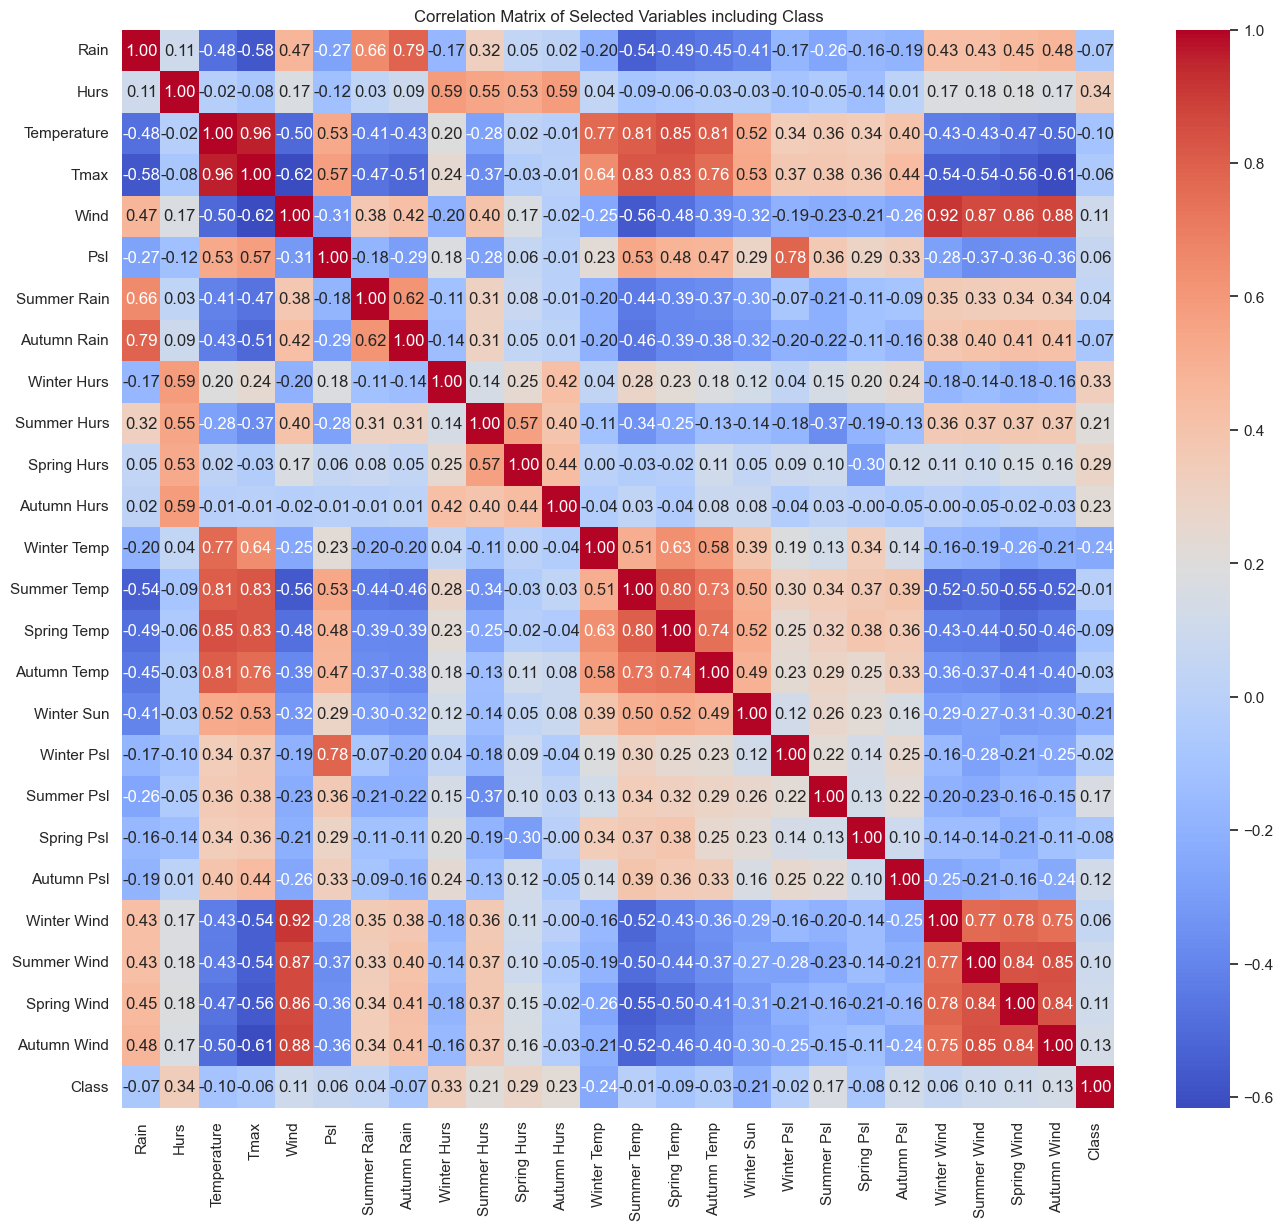

In [64]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Assuming 'df' is your DataFrame with the specified columns
selected_columns = ['Rain', 'Hurs', 'Temperature', 'Tmax',
                     'Wind', 'Psl', 'Summer Rain', 'Autumn Rain',
                     'Winter Hurs', 'Summer Hurs', 'Spring Hurs', 'Autumn Hurs',
                     'Winter Temp', 'Summer Temp', 'Spring Temp', 'Autumn Temp',
                     'Winter Sun',
                     'Winter Psl', 'Summer Psl', 'Spring Psl', 'Autumn Psl',
                     'Winter Wind', 'Summer Wind', 'Spring Wind', 'Autumn Wind', 'Class']

selected_df = df[selected_columns]

# Calculate the correlation matrix
correlation_matrix = selected_df.corr()

# Set up the matplotlib figure
plt.figure(figsize=(16, 14))

# Plot the correlation matrix using seaborn
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")

plt.title('Correlation Matrix of Selected Variables including Class')
plt.show()


## Higher Order Polynomials

### Temperature

Mean Z-Score: 2.5559091214392094e-17
Standard Deviation of Z-Scores: 1.0


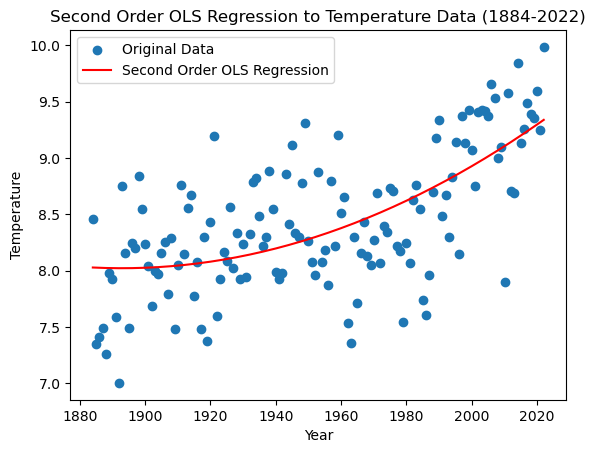

In [4]:
import xarray as xr
import numpy as np
import statsmodels.api as sm
import matplotlib.pyplot as plt
from skimage.measure import block_reduce

# Load data
data = xr.open_mfdataset(r"C:\Users\iarla\OneDrive\Documents\MSc_Project\HadUK_data\12km_Month_Temp\*.nc", parallel=True)
tas_array = np.array(data['tas'])
time = np.arange(1884, 2023)
temp = np.nanmean(block_reduce(tas_array, block_size=(12, 1, 1), func=np.mean, cval=np.mean(tas_array)), axis=(1, 2))

# Create design matrix with time and time^2
X = sm.add_constant(np.column_stack((time, time**2)))

# Fit OLS model
model = sm.OLS(temp, X)
results = model.fit()

# Generate fitted values for the given years
fit_values = results.fittedvalues

# Calculate residuals
residuals = results.resid

# Calculate the mean and standard deviation of the residuals
mean_residual = np.mean(residuals)
std_residual = np.std(residuals)

# Calculate z-scores for the residuals
z_scores = (residuals - mean_residual) / std_residual

# Print the mean and standard deviation of the z-scores
print(f'Mean Z-Score: {np.mean(z_scores)}')
print(f'Standard Deviation of Z-Scores: {np.std(z_scores)}')

# Plot the original data and the fitted curve
plt.scatter(time, temp, label='Original Data')
plt.plot(time, fit_values, color='red', label='Second Order OLS Regression')
plt.xlabel('Year')
plt.ylabel('Temperature')
plt.title('Second Order OLS Regression to Temperature Data (1884-2022)')
plt.legend()
plt.show()


Mean Z-Score: 3.1948864017990115e-17
Standard Deviation of Z-Scores: 0.9999999999999998


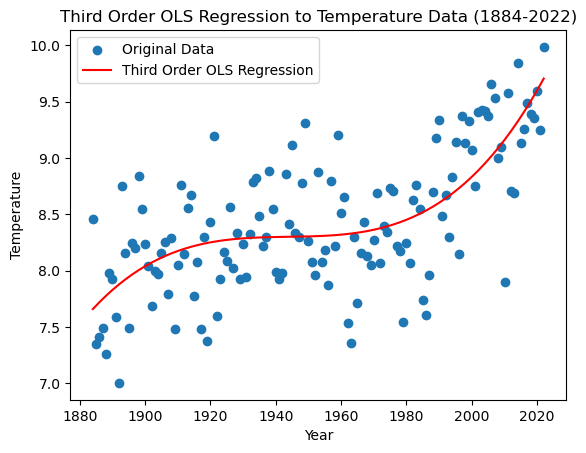

In [6]:
import xarray as xr
import numpy as np
import statsmodels.api as sm
import matplotlib.pyplot as plt
from skimage.measure import block_reduce

# Load data
data = xr.open_mfdataset(r"C:\Users\iarla\OneDrive\Documents\MSc_Project\HadUK_data\12km_Month_Temp\*.nc", parallel=True)
tas_array = np.array(data['tas'])
time = np.arange(1884, 2023)
temp = np.nanmean(block_reduce(tas_array, block_size=(12, 1, 1), func=np.mean, cval=np.mean(tas_array)), axis=(1, 2))

# Create design matrix with time, time^2, and time^3
X = sm.add_constant(np.column_stack((time, time**2, time**3)))

# Fit OLS model
model = sm.OLS(temp, X)
results = model.fit()

# Generate fitted values for the given years
fit_values = results.fittedvalues

# Calculate residuals
residuals = results.resid

# Calculate the mean and standard deviation of the residuals
mean_residual = np.mean(residuals)
std_residual = np.std(residuals)

# Calculate z-scores for the residuals
z_scores = (residuals - mean_residual) / std_residual

# Print the mean and standard deviation of the z-scores
print(f'Mean Z-Score: {np.mean(z_scores)}')
print(f'Standard Deviation of Z-Scores: {np.std(z_scores)}')

# Plot the original data and the fitted curve
plt.scatter(time, temp, label='Original Data')
plt.plot(time, fit_values, color='red', label='Third Order OLS Regression')
plt.xlabel('Year')
plt.ylabel('Temperature')
plt.title('Third Order OLS Regression to Temperature Data (1884-2022)')
plt.legend()
plt.show()


### Rainfall

Mean Z-Score: 0.0
Standard Deviation of Z-Scores: 1.0


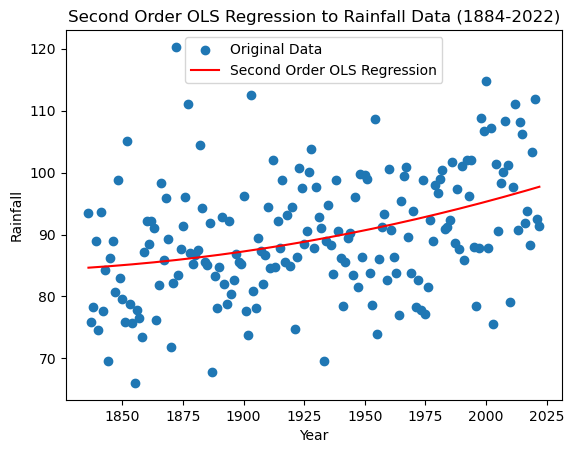

In [7]:
import xarray as xr
import numpy as np
import statsmodels.api as sm
import matplotlib.pyplot as plt
from skimage.measure import block_reduce

# Load data
data = xr.open_mfdataset(r"C:\Users\iarla\OneDrive\Documents\MSc_Project\HadUK_data\12km_Month_Rain\*.nc", parallel=True)
rain_array = np.array(data['rainfall'])
time = np.arange(1836, 2023)
rain = np.nanmean(block_reduce(rain_array, block_size=(12, 1, 1), func=np.mean, cval=np.mean(rain_array)), axis=(1, 2))

# Create design matrix with time and time^2
X = sm.add_constant(np.column_stack((time, time**2)))

# Fit OLS model
model = sm.OLS(rain, X)
results = model.fit()

# Generate fitted values for the given years
fit_values = results.fittedvalues

# Calculate residuals
residuals = results.resid

# Calculate the mean and standard deviation of the residuals
mean_residual = np.mean(residuals)
std_residual = np.std(residuals)

# Calculate z-scores for the residuals
z_scores = (residuals - mean_residual) / std_residual

# Print the mean and standard deviation of the z-scores
print(f'Mean Z-Score: {np.mean(z_scores)}')
print(f'Standard Deviation of Z-Scores: {np.std(z_scores)}')

# Plot the original data and the fitted curve
plt.scatter(time, rain, label='Original Data')
plt.plot(time, fit_values, color='red', label='Second Order OLS Regression')
plt.xlabel('Year')
plt.ylabel('Rainfall')
plt.title('Second Order OLS Regression to Rainfall Data (1884-2022)')
plt.legend()
plt.show()


Mean Z-Score: 2.8497703305886374e-17
Standard Deviation of Z-Scores: 1.0


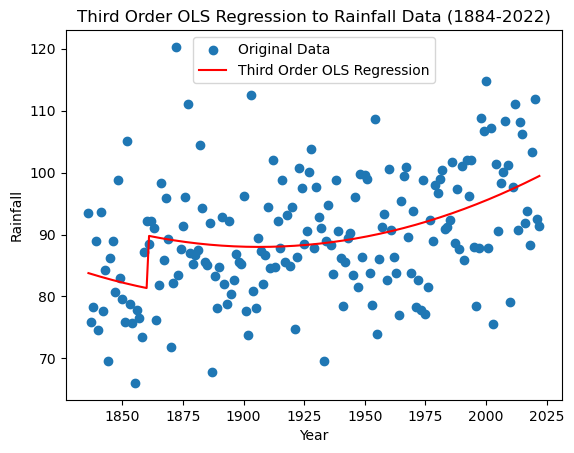

In [8]:
import xarray as xr
import numpy as np
import statsmodels.api as sm
import matplotlib.pyplot as plt
from skimage.measure import block_reduce

# Load data
data = xr.open_mfdataset(r"C:\Users\iarla\OneDrive\Documents\MSc_Project\HadUK_data\12km_Month_Rain\*.nc", parallel=True)
rain_array = np.array(data['rainfall'])
time = np.arange(1836, 2023)
rain = np.nanmean(block_reduce(rain_array, block_size=(12, 1, 1), func=np.mean, cval=np.mean(rain_array)), axis=(1, 2))

# Create design matrix with time, time^2, and time^3
X = sm.add_constant(np.column_stack((time, time**2, time**3)))

# Fit OLS model
model = sm.OLS(rain, X)
results = model.fit()

# Generate fitted values for the given years
fit_values = results.fittedvalues

# Calculate residuals
residuals = results.resid

# Calculate the mean and standard deviation of the residuals
mean_residual = np.mean(residuals)
std_residual = np.std(residuals)

# Calculate z-scores for the residuals
z_scores = (residuals - mean_residual) / std_residual

# Print the mean and standard deviation of the z-scores
print(f'Mean Z-Score: {np.mean(z_scores)}')
print(f'Standard Deviation of Z-Scores: {np.std(z_scores)}')

# Plot the original data and the fitted curve
plt.scatter(time, rain, label='Original Data')
plt.plot(time, fit_values, color='red', label='Third Order OLS Regression')
plt.xlabel('Year')
plt.ylabel('Rainfall')
plt.title('Third Order OLS Regression to Rainfall Data (1884-2022)')
plt.legend()
plt.show()
